In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel('5 yrs wind generation.xlsx', 
                 parse_dates = ['Date'], index_col = 'Date')

In [26]:
df.head()

,Wind Generation(MU)
Date,
2017-01-01,41
2017-01-02,48
2017-01-03,45
2017-01-04,43
2017-01-05,29


In [27]:
df.tail()

,Wind Generation(MU)
Date,
2022-03-23,146
2022-03-24,133
2022-03-25,115
2022-03-26,73
2022-03-27,65


In [28]:
# Checking shape of our data
df.shape
print("Our data contains", df.shape[0],"Rows and", df.shape[1], "Columns")

Our data contains 1912 Rows and 1 Columns


In [29]:
# Getting information of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1912 entries, 2017-01-01 to 2022-03-27
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Wind Generation(MU)  1912 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [30]:
# Datatypes of features
df.dtypes.value_counts()

int64    1
dtype: int64

In [31]:
# Checking for null values
df.isnull().values.any()

False

In [32]:
df.describe()

,Wind Generation(MU)
count,1912.000000
mean,151.653766
std,100.661306
min,5.000000
25%,80.750000
50%,114.000000
75%,207.000000
max,541.000000


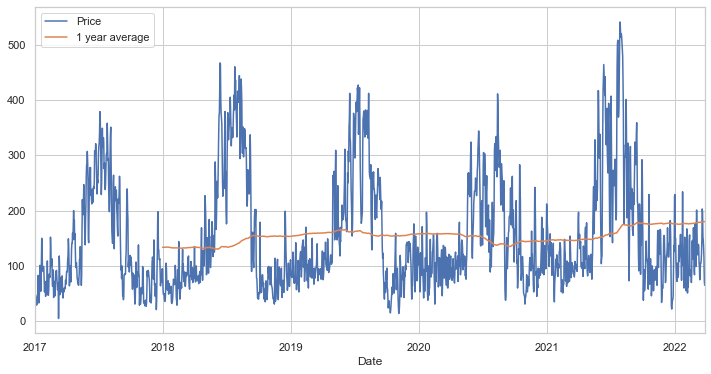

In [33]:
sns.set()
sns.set_style('whitegrid')
df['Wind Generation(MU)'].plot(figsize=(12,6),label='Price')
df['Wind Generation(MU)'].rolling(window=365).mean().plot(label='1 year average')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

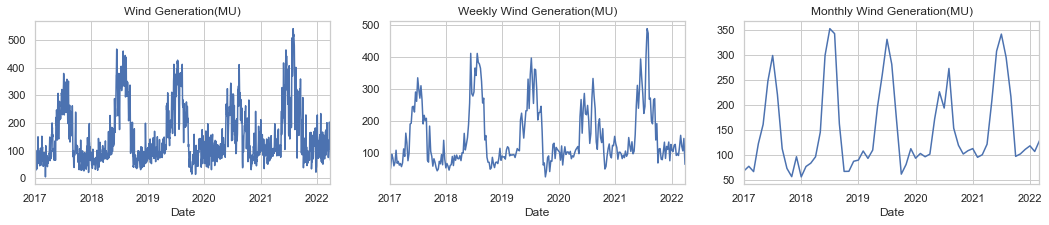

In [34]:
# Plotting data on daily ,weekly and monthly basis
for i, col in enumerate(df.columns):
    fig,ax = plt.subplots(1,3, figsize=(18,3))
    ax[0].set_title(col)
    ax[1].set_title("Weekly " + col)
    ax[2].set_title("Monthly " + col)
    df[col].plot(ax = ax[0])
    df[col].resample('7D').mean().plot(ax = ax[1])
    df[col].resample('M').mean().plot(ax = ax[2])
    plt.show()

In [35]:
# Creating a column which will store the price of bitcoin after two days 
df['Wind Generation(MU) after 365 days'] = df['Wind Generation(MU)'].shift(-365)

In [36]:
X = pd.DataFrame(df['Wind Generation(MU)'])
y =  pd.DataFrame(df['Wind Generation(MU) after 365 days'])

In [37]:
X = np.array(X.iloc[1:1547,:])
y = np.array(y.iloc[1:1547,:])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(f"Mean Absolute Error            : {round(mean_absolute_error(y_pred,y_test),2)}")
print(f"Mean Squared Error             : {round(mean_squared_error(y_pred,y_test),2)}")
print(f"Root Mean Squared Error        : {round(sqrt(mean_squared_error(y_pred,y_test)),2)}")
print(f"Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_pred,y_test),2)}")

Mean Absolute Error            : 54.65
Mean Squared Error             : 5911.85
Root Mean Squared Error        : 76.89
Mean Absolute Percentage Error : 0.35


In [41]:
forecast = lr.predict(np.array(df['Wind Generation(MU)'].tail(365)).reshape(-1,1))

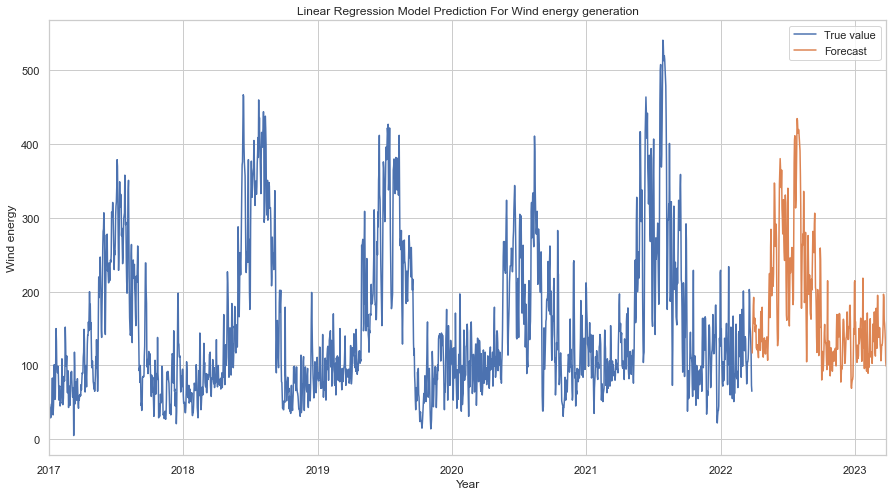

In [42]:
from datetime import datetime, timedelta
last_date = df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=365,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df = df.append(df1)
df['Wind Generation(MU)'].plot(figsize=(15,8), label = 'True value')
df['Forecast'].plot(label='Forecast')
plt.xlabel('Year')
plt.ylabel('Wind energy')
plt.title('Linear Regression Model Prediction For Wind energy generation')
plt.legend()

In [43]:
lr.coef_

array([[0.70464742]])

In [44]:
lr.intercept_

array([53.49572528])

In [45]:
df1

,Forecast
2022-03-28,116.913993
2022-03-29,143.690595
2022-03-30,157.078895
2022-03-31,181.741555
2022-04-01,192.311266
...,...
2023-03-23,156.374248
2023-03-24,147.213832
2023-03-25,134.530178
2023-03-26,104.934987


In [46]:
df1.describe()

,Forecast
count,365.000000
mean,180.312955
std,81.119886
min,68.997968
25%,122.551172
50%,151.441716
75%,216.973926
max,434.709977
